Introduction :- Electric Vehicle Range Prediction_YashwanthGoduguchintha 

For drivers of electric vehicles (EVs), range is a primary focus. As EVs become more popular, drivers want to know not just “How far can I go?” but also “How can I go further?” EV range, put simply, is the distance a car can travel on a single charge.

In this notebook, I explore the EV cars dataset and develop Regression to try estimate EV range.

In [ ]:
#Importing the Libraries and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/ElectricCarData_Clean.csv')
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


2.Explore Data (Exploratory Data Analysis)

In [ ]:
#Check available features
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
#Full summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [ ]:
#Check the number of rows and columns
df.shape

(103, 14)

In [ ]:
#Check missing value
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [ ]:
#Check data type of each column
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

In [ ]:
#Check the unique values of the dataset
df.nunique()

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      51
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

In [ ]:
#Descriptive Statistics of the dataset
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

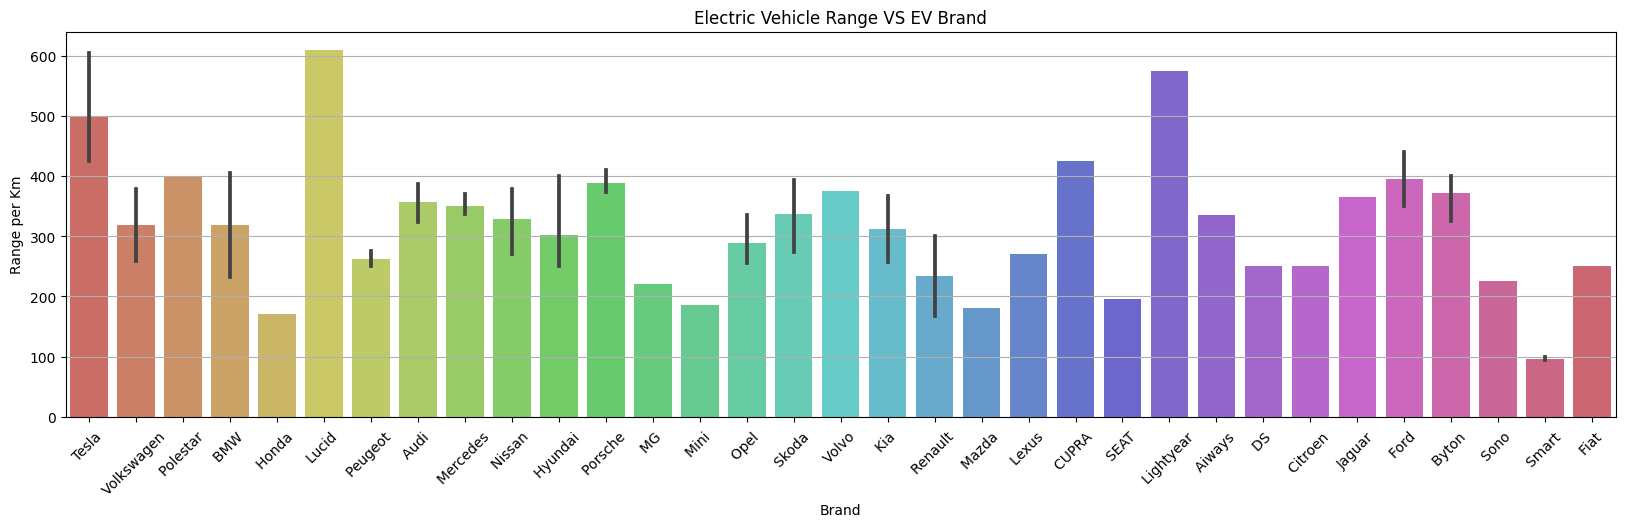

In [ ]:
#Analysis range by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Electric Vehicle Range VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Range per Km')
plt.xticks(rotation=45)

In [ ]:
#Model with highest Range
range_df = df.sort_values(by=['Range_Km'], ascending=False)
range_df[['Brand','Model','Range_Km']].head(n=1)

,Brand,Model,Range_Km
51,Tesla,Roadster,970


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

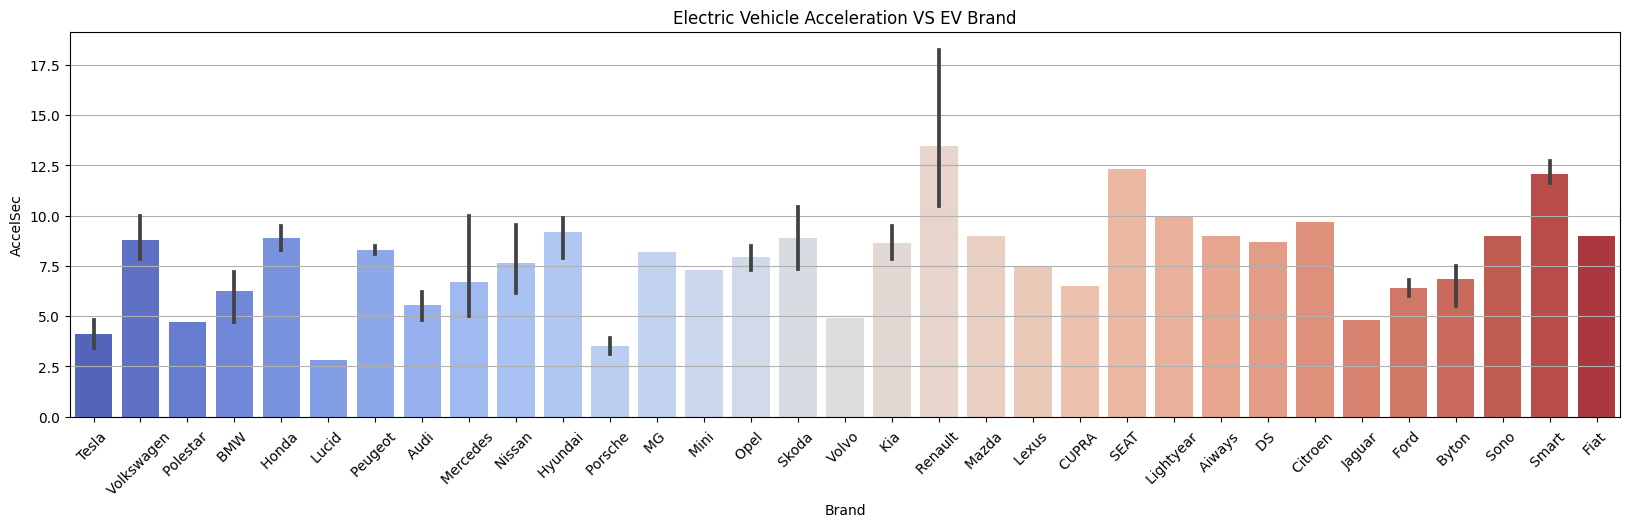

In [ ]:
#Analysis acceleration by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='AccelSec',data=df,palette='coolwarm')
plt.grid(axis='y')
plt.title('Electric Vehicle Acceleration VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('AccelSec')
plt.xticks(rotation=45)

In [ ]:
#Model with the shortest Acceleration time
df = df.sort_values(by=['AccelSec'], ascending=True)
df[['Brand','Model','AccelSec']].head(n=1)

,Brand,Model,AccelSec
51,Tesla,Roadster,2.1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Lucid '),
  Text(2, 0, 'Porsche '),
  Text(3, 0, 'Audi '),
  Text(4, 0, 'BMW '),
  Text(5, 0, 'Polestar '),
  Text(6, 0, 'Jaguar '),
  Text(7, 0, 'Volvo '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Byton '),
  Text(11, 0, 'Ford '),
  Text(12, 0, 'Skoda '),
  Text(13, 0, 'CUPRA '),
  Text(14, 0, 'Mini '),
  Text(15, 0, 'Volkswagen '),
  Text(16, 0, 'Opel '),
  Text(17, 0, 'Lexus '),
  Text(18, 0, 'Kia '),
  Text(19, 0, 'Hyundai '),
  Text(20, 0, 'Peugeot '),
  Text(21, 0, 'MG '),
  Text(22, 0, 'Honda '),
  Text(23, 0, 'DS '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'Sono '),
  Text(26, 0, 'Fiat '),
  Text(27, 0, 'Mazda '),
  Text(28, 0, 'Renault '),
  Text(29, 0, 'Citroen '),
  Text(30, 0, 'Lightyear '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'SEAT ')])

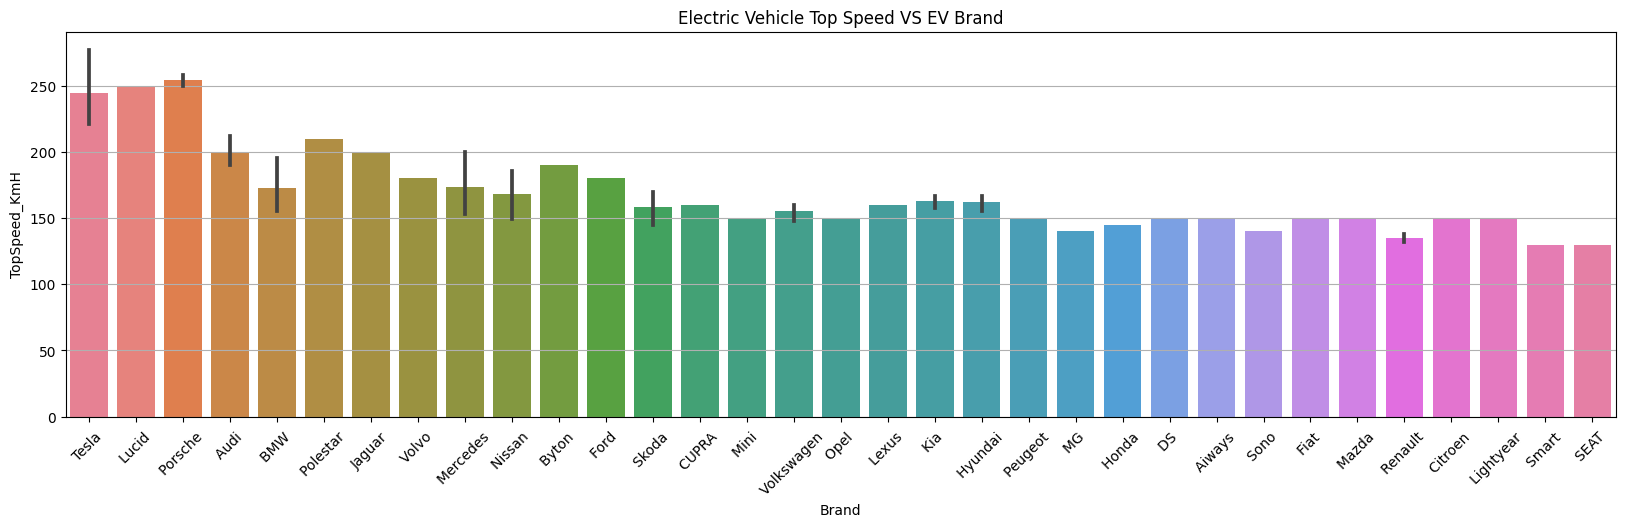

In [ ]:
#Analysis top speed by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df,palette='husl')
plt.grid(axis='y')
plt.title('Electric Vehicle Top Speed VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('TopSpeed_KmH')
plt.xticks(rotation=45)

In [ ]:
#Model with Top Speed
speed_df = df.sort_values(by=['TopSpeed_KmH'], ascending=False)
speed_df[['Brand','Model','TopSpeed_KmH']].head(n=1)

,Brand,Model,TopSpeed_KmH
51,Tesla,Roadster,410


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Lucid '),
  Text(2, 0, 'Porsche '),
  Text(3, 0, 'Audi '),
  Text(4, 0, 'BMW '),
  Text(5, 0, 'Polestar '),
  Text(6, 0, 'Jaguar '),
  Text(7, 0, 'Volvo '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Byton '),
  Text(11, 0, 'Ford '),
  Text(12, 0, 'Skoda '),
  Text(13, 0, 'CUPRA '),
  Text(14, 0, 'Mini '),
  Text(15, 0, 'Volkswagen '),
  Text(16, 0, 'Opel '),
  Text(17, 0, 'Lexus '),
  Text(18, 0, 'Kia '),
  Text(19, 0, 'Hyundai '),
  Text(20, 0, 'Peugeot '),
  Text(21, 0, 'MG '),
  Text(22, 0, 'Honda '),
  Text(23, 0, 'DS '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'Sono '),
  Text(26, 0, 'Fiat '),
  Text(27, 0, 'Mazda '),
  Text(28, 0, 'Renault '),
  Text(29, 0, 'Citroen '),
  Text(30, 0, 'Lightyear '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'SEAT ')])

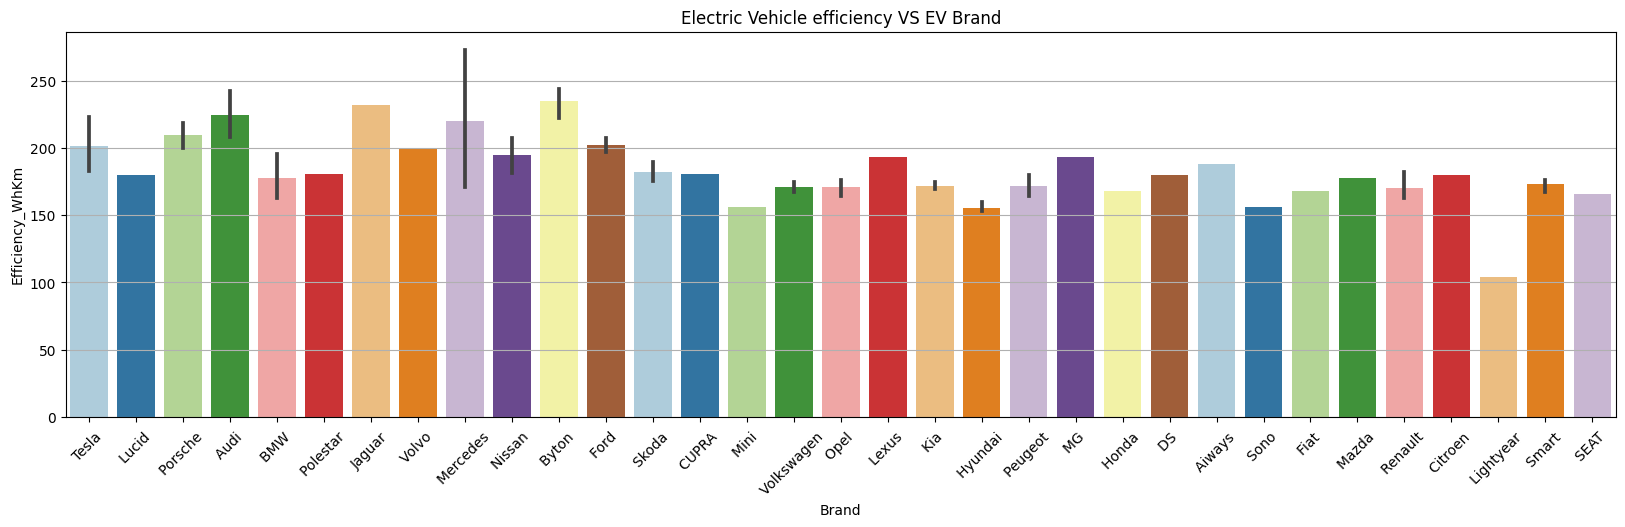

In [ ]:
#Analysis efficiency by EV Brand
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='Paired')
plt.grid(axis='y')
plt.title('Electric Vehicle efficiency VS EV Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency_WhKm')
plt.xticks(rotation=45)

In [ ]:
#Model with maximum Efficiency
eff_df = df.sort_values(by=['Efficiency_WhKm'], ascending=False)
eff_df[['Brand','Model','Efficiency_WhKm']].head(n=1)

,Brand,Model,Efficiency_WhKm
84,Mercedes,EQV 300 Long,273


In [ ]:
#Model with the highest Range & maximum seats
seat_df = df.sort_values(by=['Seats'], ascending=False)
seat_df[['Brand','Model','Range_Km', 'Seats']].head(n=1)

,Brand,Model,Range_Km,Seats
81,Tesla,Model X Performance,440,7


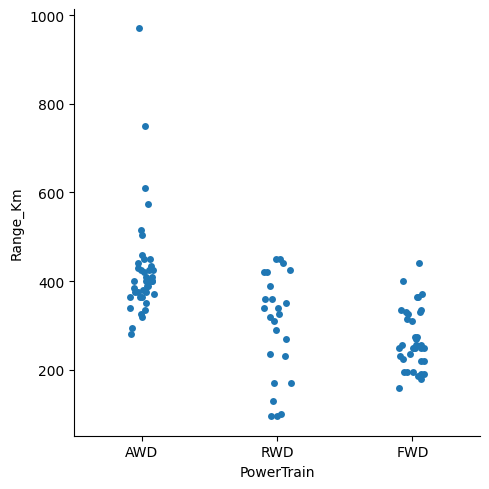

In [ ]:
##Distribution of range with PowerTrain
fig, axs = plt.subplots(1,2)
sns.catplot(x="PowerTrain", y="Range_Km", data=df)
plt.close(1)

3. Encoding categorical data

In [ ]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [ ]:
df1 = df[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]

In [ ]:
print(df1)

# define ordinal encoding
encoder = OrdinalEncoder()

# transform data
result = encoder.fit_transform(df1)
print(result)

       Brand                Model PowerTrain RapidCharge        PlugType  \
51    Tesla             Roadster         AWD         Yes      Type 2 CCS   
59    Tesla   Model S Performance        AWD         Yes          Type 2   
81    Tesla   Model X Performance        AWD         Yes          Type 2   
5     Lucid                  Air         AWD         Yes      Type 2 CCS   
16  Porsche        Taycan Turbo S        AWD         Yes      Type 2 CCS   
..       ...                  ...        ...         ...             ...   
43    Skoda           CITIGOe iV         FWD         Yes      Type 2 CCS   
57  Renault             Twingo ZE        RWD          No          Type 2   
77    Smart           EQ forfour         RWD          No          Type 2   
66   Nissan       e-NV200 Evalia         FWD         Yes  Type 1 CHAdeMO   
68  Renault     Kangoo Maxi ZE 33        FWD          No          Type 2   

    BodyStyle Segment  
51     Cabrio       S  
59   Liftback       F  
81        SUV  

In [ ]:
temp = ['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']

In [ ]:
df.drop(temp,axis=1,inplace=True)

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result.columns=["Brand", "Model", "PowerTrain", 'RapidCharge', "PlugType", "BodyStyle", "Segment"]
result.index+=1

In [ ]:
result

,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
1,30.0,63.0,0.0,1.0,2.0,0.0,7.0
2,30.0,50.0,0.0,1.0,1.0,2.0,5.0
3,30.0,52.0,0.0,1.0,1.0,6.0,5.0
4,15.0,4.0,0.0,1.0,2.0,7.0,5.0
5,24.0,69.0,0.0,1.0,2.0,7.0,5.0
...,...,...,...,...,...,...,...
99,27.0,11.0,1.0,1.0,2.0,1.0,0.0
100,25.0,70.0,2.0,0.0,1.0,1.0,0.0
101,28.0,17.0,2.0,0.0,1.0,1.0,0.0
102,20.0,84.0,1.0,1.0,0.0,5.0,6.0


In [ ]:
df1 = df
df1.index+=1

In [ ]:
df1[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']] = result[['Brand', 'Model', 'PowerTrain', 'RapidCharge', 'PlugType', 'BodyStyle', 'Segment']]
df

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
52,2.1,410,970,206,920,4,215000,21.0,5.0,1.0,1.0,2.0,3.0,1.0
60,2.5,261,505,188,550,5,96990,12.0,86.0,1.0,1.0,2.0,6.0,2.0
82,2.8,250,440,216,480,7,102990,25.0,77.0,1.0,1.0,2.0,1.0,1.0
6,2.8,250,610,180,620,5,105000,30.0,16.0,0.0,1.0,2.0,4.0,6.0
17,2.8,260,375,223,780,4,180781,1.0,94.0,0.0,1.0,2.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,12.3,130,195,166,170,4,24534,2.0,99.0,2.0,1.0,2.0,1.0,1.0
58,12.6,135,130,164,-,4,24790,13.0,72.0,1.0,1.0,3.0,6.0,2.0
78,12.7,130,95,176,-,4,22030,7.0,3.0,1.0,1.0,2.0,1.0,1.0
67,14.0,123,190,200,190,7,33246,22.0,81.0,1.0,1.0,2.0,1.0,1.0


In [ ]:
#Check correlation between different features
df.corr()

<ipython-input-37-82d163411333>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro,Brand,Model,PowerTrain,RapidCharge,PlugType,BodyStyle,Segment
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.175335,-0.627174,-0.015211,0.077503,0.079622,0.002717,0.097642,-0.185445,-0.031663
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.126470,0.829057,-0.003225,-0.100816,0.002026,-0.011491,-0.056466,0.020703,-0.040329
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.300163,0.674844,-0.065009,-0.054853,-0.034450,0.055454,0.059166,0.077933,-0.025072
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.301230,0.396705,-0.157891,0.075473,0.111623,-0.126169,-0.194429,0.116093,-0.196122
Seats,-0.175335,0.126470,0.300163,0.301230,1.000000,0.020920,0.080244,0.051631,0.048956,0.023814,0.002156,-0.000333,-0.098236
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.020920,1.000000,-0.070114,-0.105356,0.039415,-0.000033,0.076438,-0.014603,-0.118268
Brand,-0.015211,-0.003225,-0.065009,-0.157891,0.080244,-0.070114,1.000000,-0.401572,0.056464,-0.188137,-0.231104,-0.275860,-0.002040
Model,0.077503,-0.100816,-0.054853,0.075473,0.051631,-0.105356,-0.401572,1.000000,-0.007609,0.144293,0.023750,0.261255,0.068414
PowerTrain,0.079622,0.002026,-0.034450,0.111623,0.048956,0.039415,0.056464,-0.007609,1.000000,-0.274797,-0.039763,-0.349484,-0.497850
RapidCharge,0.002717,-0.011491,0.055454,-0.126169,0.023814,-0.000033,-0.188137,0.144293,-0.274797,1.000000,0.539160,0.223577,0.189954


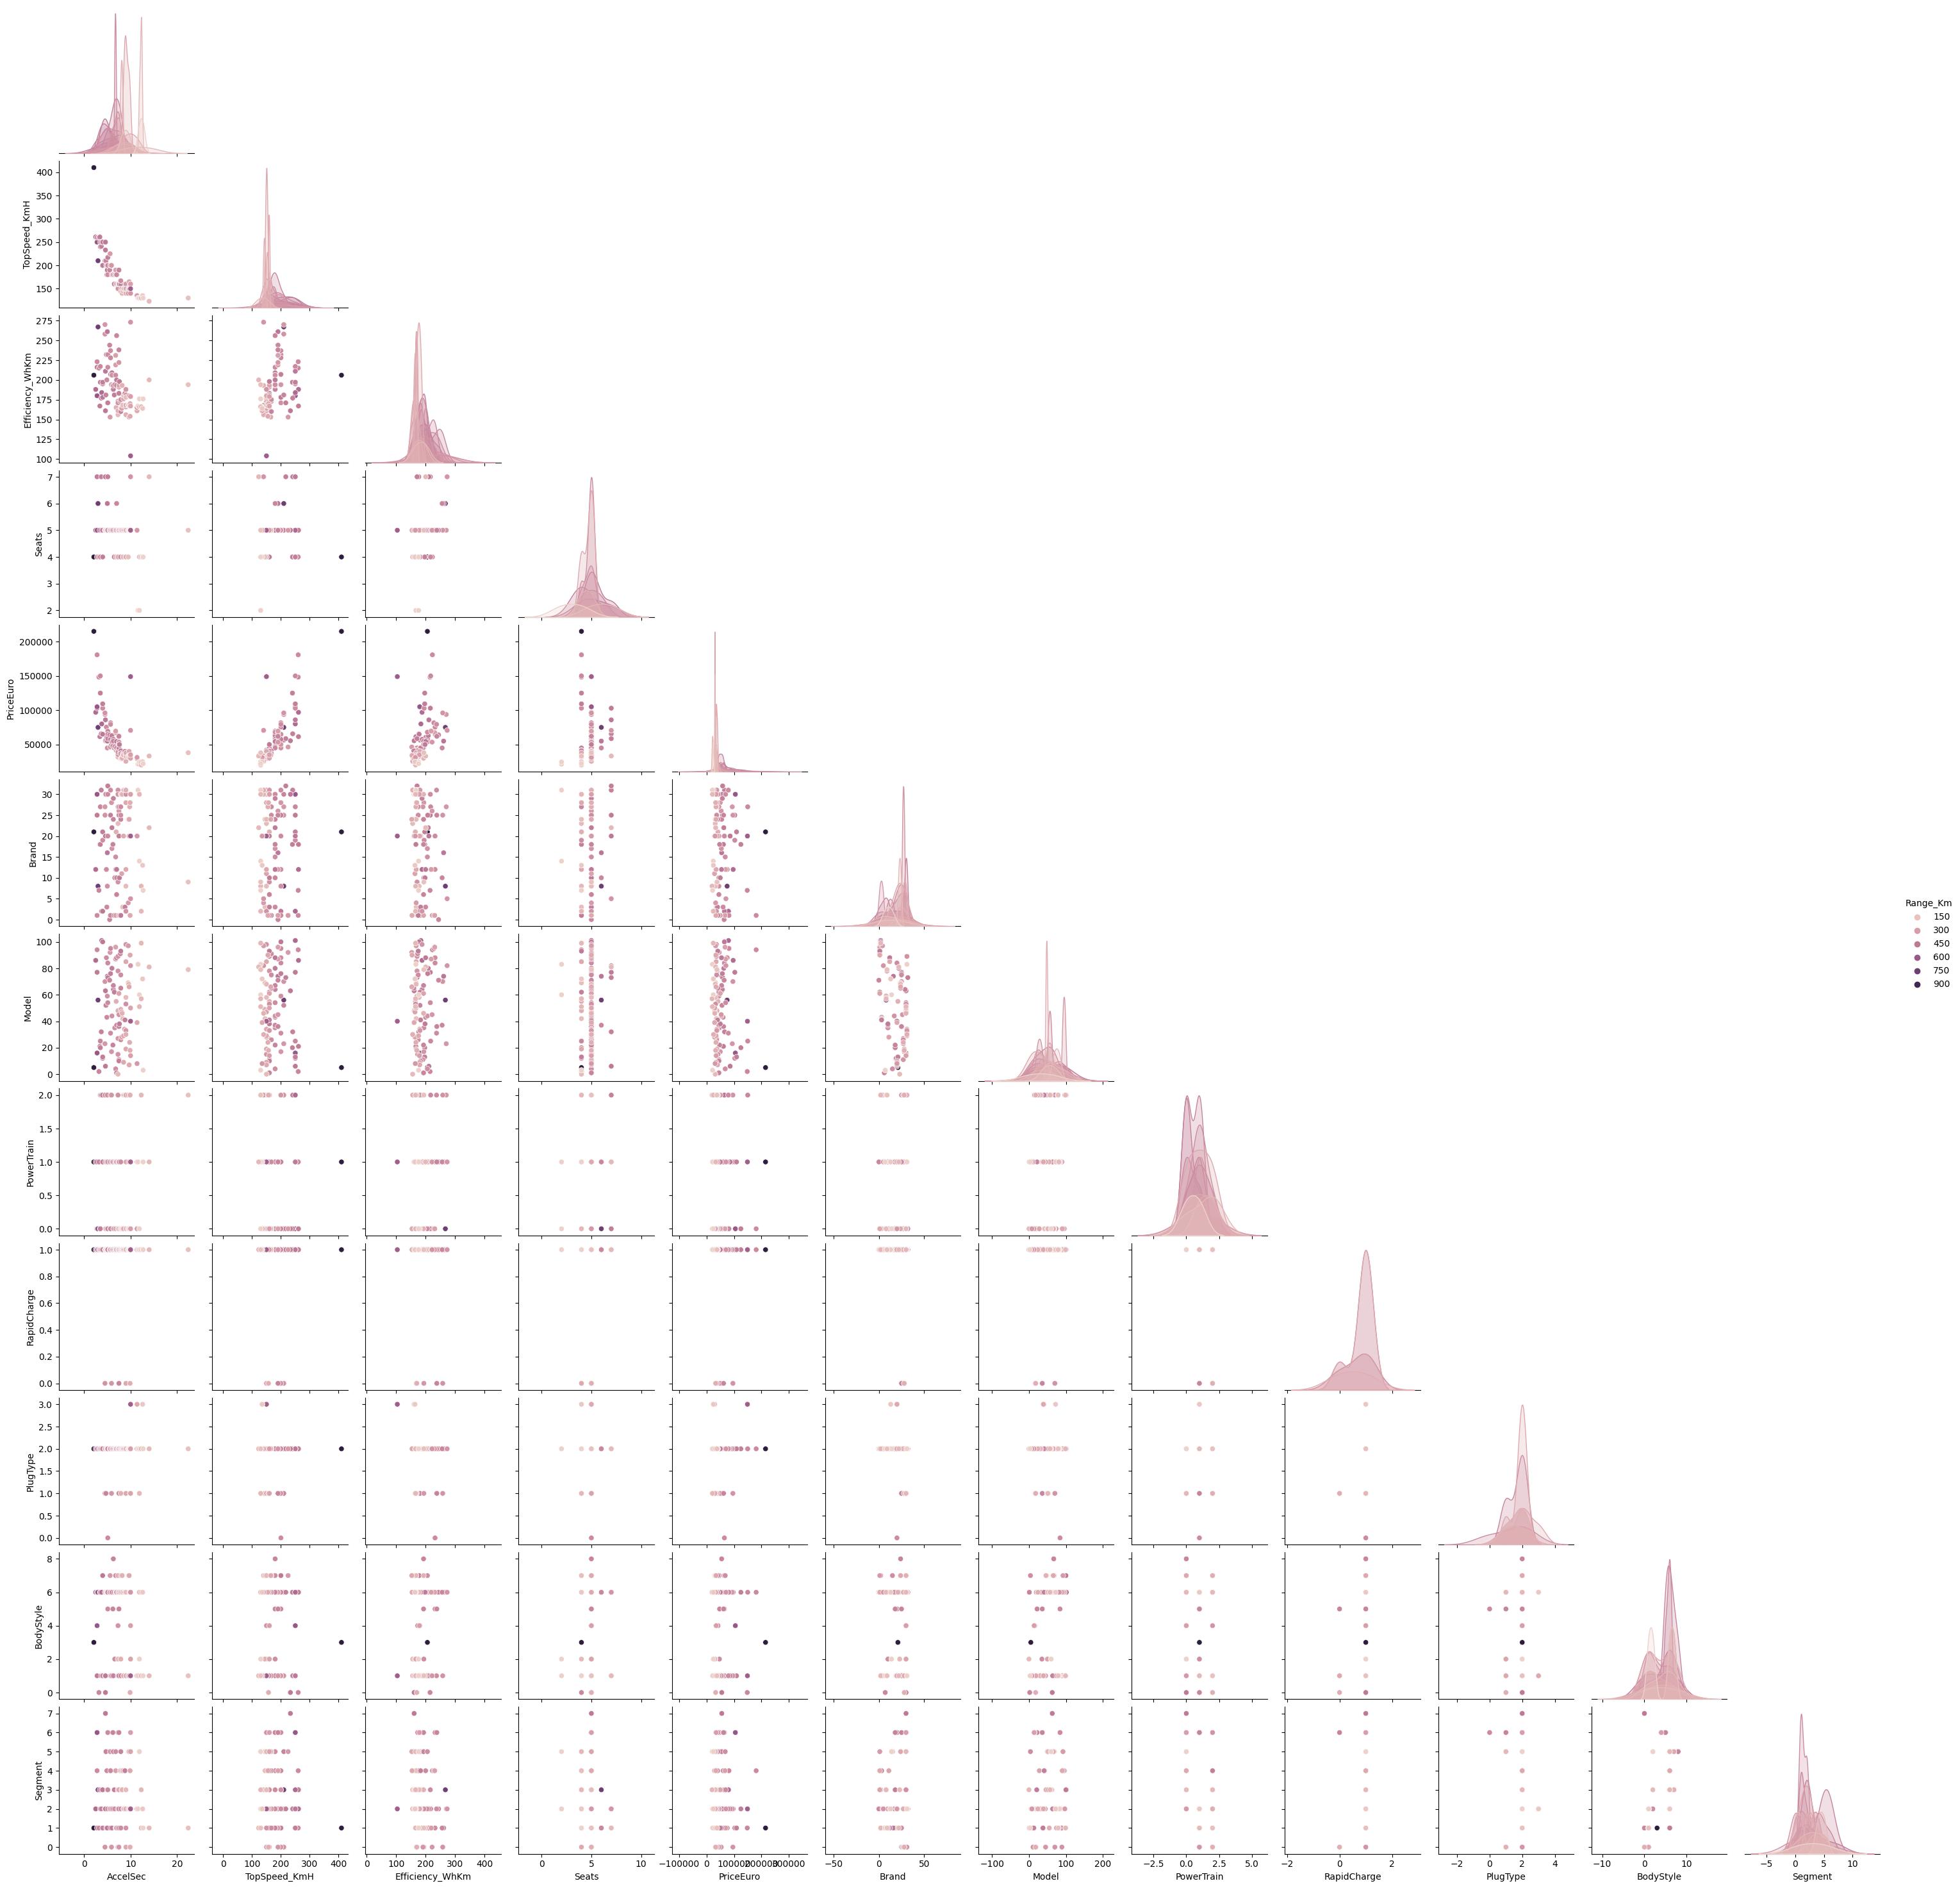

In [ ]:
#Pairplot show the correlation of the data
sns.pairplot(df,
             corner = True,
             kind = 'scatter',
             hue = 'Range_Km')
plt.show()

<ipython-input-39-548ca9e70b17>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)


<Axes: >

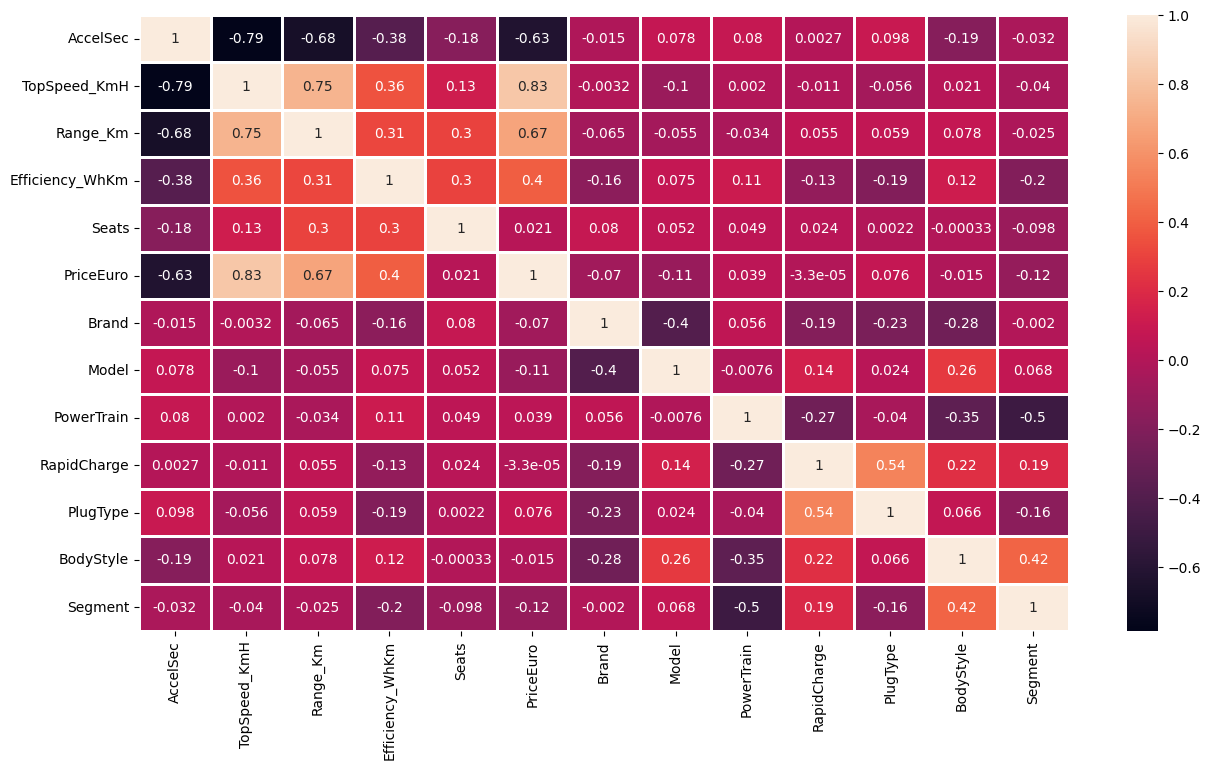

In [ ]:
#Heatmap to show the correlation of the data
ax= plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

Electric Vehicle Range have strong positive correlation with Top Speed per Km driving. It might be sufficient to predit Electric Vehicle Range and then calculate range in Top Speed per Km.

Electric Vehicle Range have a strong negative correlation with Acceleration per second.

4. Feature Selection

In [ ]:
#Define the target value(dependant variable) as y
X = df['TopSpeed_KmH'].values.reshape(-1,1)
y = df['Range_Km']

5.  Create a Model

Linear Regression model is one of the most common algorithms for the regression task.

Strengths:

Simple implementation Linear Regression is a very simple algorithm that can be implemented very easily to give satisfactory results.

Performance on linearly seperable datasets Linear regression fits linearly seperable datasets almost perfectly and is often used to find the nature of the relationship between variable

Overfitting can be reduced by regularization Overfitting is a situation that arises when a machine learning model fits a dataset very closely and hence captures the noisy data as well.

Weaknesses:

Prone to underfitting Underfitting : A sitiuation that arises when a machine learning model fails to capture the data properly.This typically occurs when the hypothesis function cannot fit the data well.

Sensitive to outliers Outliers of a data set are anomalies or extreme values that deviate from the other data points of the distribution.

Linear Regression assumes that the data is independent Very often the inputs aren't independent of each other and hence any multicollinearity must be removed before applying linear regression.

Assumptions:

Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

Homoscedasticity: The residuals have constant variance at every level of x.

Normality: The residuals of the model are normally distributed.

In [ ]:
#Training and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
## Check Shape, Sample of Test Train Data
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (82, 1)
X_test :  (21, 1)
y_train :  (82,)
y_test :  (21,)


(0.0, 1013.75)

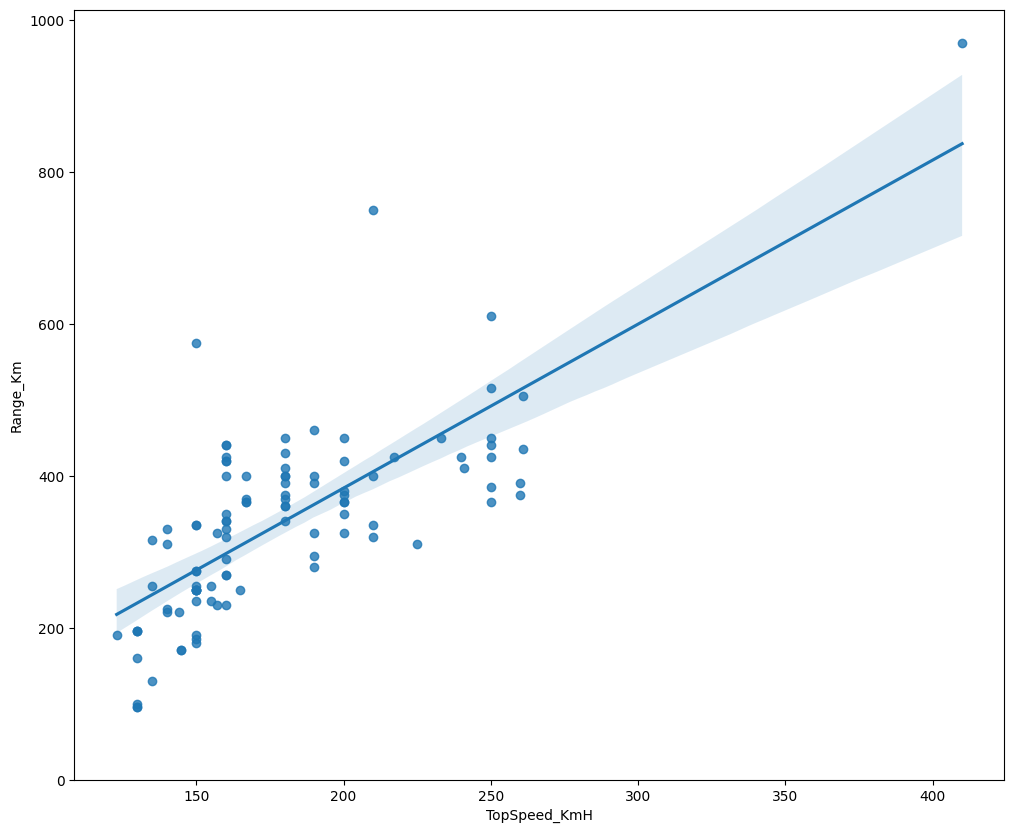

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="TopSpeed_KmH", y="Range_Km", data=df)
plt.ylim(0,)

7. Use Forward Feature Selection to pick a good model

In [ ]:
# Predictors
X = df[['TopSpeed_KmH','Efficiency_WhKm','Segment','Seats','AccelSec','PriceEuro']]

In [ ]:
# Target
y = df['Range_Km']

In [ ]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = AccelSec, PriceEuro, Segment, TopSpeed_KmH, Seats, Efficiency_WhKm
(Step) Trying AccelSec...
(Step) - Features = AccelSec
(Step) - Adjusted R^2: This = 0.451; Best = 0.000
(Step) - New Best!   : Feature = AccelSec; R^2 = 0.458; Adjusted R^2 = 0.451
(Step) Trying PriceEuro...
(Step) - Features = PriceEuro
(Step) - Adjusted R^2: This = 0.362; Best = 0.451
(Step) Trying Segment...
(Step) - Features = Segment
(Step) - Adjusted R^2: This = -0.012; Best = 0.451
(Step) Trying TopSpeed_KmH...
(Step) - Features = TopSpeed_KmH
(Step) - Adjusted R^2: This = 0.415; Best = 0.451
(Step) Trying Seats...
(Step) - Features = Seats
(Step) - Adjusted R^2: This = 0.142; Best = 0.451
(Step) Trying Efficiency_WhKm...
(Step) - Features = Efficiency_WhKm
(Step) - Adjusted R^2: This = 0.095; Best = 0.451
Added feature AccelSec with R^2 = 0.458 and adjusted R^2 = 0.451

(Step) Excluded = PriceEuro, Segment, Efficiency_WhKm, TopSpeed_KmH, Seats
(Step) Trying PriceEuro...
(Step) - Features = Ac

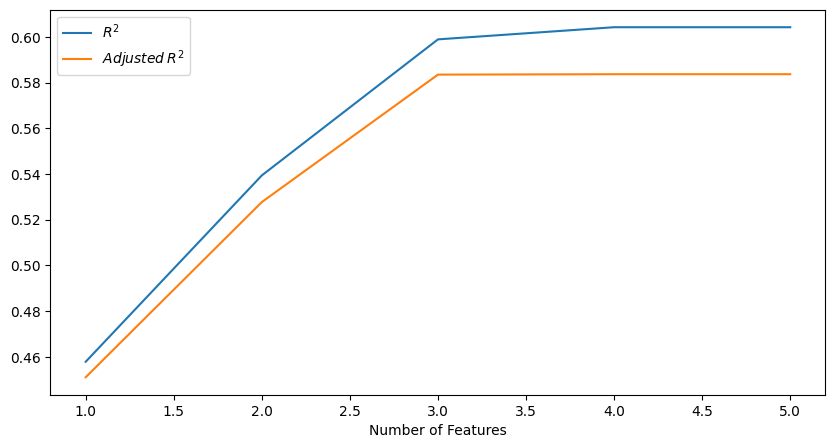

In [ ]:
## Display both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
df.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm',
       'FastCharge_KmH', 'Seats', 'PriceEuro', 'Brand', 'Model', 'PowerTrain',
       'RapidCharge', 'PlugType', 'BodyStyle', 'Segment'],
      dtype='object')

In [ ]:
names = ['Linear Regression', "KNN", "Linear_SVM","Gradient_Boosting", "Random_Forest",'Ridge', 'Lasso']

In [ ]:
regressors = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=3),
    SVR(kernel="rbf", C=1.0),
    GradientBoostingRegressor(n_estimators=100),
    RandomForestRegressor(max_depth=5, n_estimators=100),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0)]

In [ ]:
scores = []
for name, clf in zip(names, regressors):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)
scores_df = pd.DataFrame()
scores_df['name'] = names
scores_df['score'] = scores
scores_df.sort_values('score', ascending= False)

,name,score
6,Lasso,0.607504
5,Ridge,0.602550
0,Linear Regression,0.599879
4,Random_Forest,0.513976
3,Gradient_Boosting,0.505572
1,KNN,0.398045
2,Linear_SVM,0.034445


In [ ]:
learning_rate_range = np.arange(0.1,1.2,0.2)
loss_range = ['squared_error','absolute_error','huber','quantile']
max_depth_range = np.arange(3,15,3)
max_features_range = np.arange(1,11,1)
param_distributions = dict(learning_rate=learning_rate_range, max_features=max_features_range, loss=loss_range, max_depth=max_depth_range)
estimator=GradientBoostingRegressor(random_state=42)
grid = RandomizedSearchCV(estimator=estimator, param_distributions=param_distributions, cv=5)
grid.fit(X_train, y_train)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 5, 'max_depth': 3, 'loss': 'absolute_error', 'learning_rate': 0.1} with a score of 0.49


In [ ]:
model = GradientBoostingRegressor(max_features= 5, max_depth= 6, loss= 'huber', learning_rate= 0.30000000000000004,random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.30000000000000004, loss='huber',
                          max_depth=6, max_features=5, random_state=42)

In [ ]:
print('The validation score of our model is {:0.2f}%.'.format(model.score(X_train, y_train)*100))

The validation score of our model is 100.00%.


Conclusions
From my analysis, affect EV Range Factors are TopSpeed_KmH, Efficiency_WhKm, AccelSec, Segment, Seats and PriceEuro.

There are a number of factors that also affect EV range:

Your driving style

Terrain and road condition

The weather

The weight of the vehicle

Using the heating and air conditioning

Condition of the tyres

Condition of the battery

Tips to Maximize Range (Example for EV car - Tesla Model Y)

Slow down your driving and avoid frequent and rapid acceleration.

If safe to do so, modulate the accelerator pedal instead of using the brake pedal when gradually slowing down.

Limit the use of resources such as heating and air conditioning.

With your vehicle plugged in, use the mobile app to precondition your vehicle to ensure the cabin is at a comfortable temperature and windows are defrosted (if needed) before your drive

Touch Schedule, available on both the charging and climate control screens, to set a time when you want your vehicle to be ready to drive

Set Stopping Mode to Hold to gain the benefit of regenerative braking at low driving speeds

Ensure the wheels are aligned to specification, the tires are kept at the recommended inflation pressures (see Tire Care and Maintenance), and are rotated when needed

Install aero covers (if equipped) to reduce wind resistance

Lighten your load by removing any unnecessary cargo.

Fully raise all windows.

Features such as Sentry Mode and Cabin Overheat Protection can impact range. Disable features when not needed.

To prevent an excessive amount of energy consumption while the vehicle is idle, keep the vehicle plugged in when not in use.

Minimize the use of DC chargers (such as Superchargers) for optimal Battery health.